<a href="https://colab.research.google.com/github/desbaa32/Master2BD_tp_pro/blob/master/Tp3Classification_multilabel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **EXERCICE 1** :model multi-etiquettes

#### Construction du modèle

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 1) Créer un modèle séquentiel.
model = Sequential()

# 2) Ajouter une couche cachée de 64 neurones avec une fonction d'activation relu.
model.add(Dense(64, activation='relu', input_shape=(20,)))

# 3) Ajouter une couche de sortie avec une fonction d'activation sigmoïde
model.add(Dense(3, activation='sigmoid'))

model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 64)             │         1,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,539 (6.01 KB)

 Trainable params: 1,539 (6.01 KB)

 Non-trainable params: 0 (0.00 B)

In [42]:
## 4) Compiler le modèle avec adam et binary_crossentropy.
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#### Entraînement multi-étiquettes

In [43]:
import numpy as np
# data
sensors_train = np.load('/content/sensors_train.npy')
parcels_train = np.load('/content/parcels_train.npy')
sensors_test = np.load('/content/sensors_test.npy')
parcels_test = np.load('/content/parcels_test.npy')

# 5) Entraîner le modèle pour 100 périodes.
history = model.fit(sensors_train, parcels_train, epochs=100, verbose=1)
# 6) Prédire le résultat des données de test.
predictions = model.predict(sensors_test,verbose=1)



Epoch 1/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5730 - loss: 0.9873
Epoch 2/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5389 - loss: 0.5223
Epoch 3/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5841 - loss: 0.4153
Epoch 4/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5694 - loss: 0.3707
Epoch 5/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5896 - loss: 0.3388
Epoch 6/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6128 - loss: 0.3164
Epoch 7/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5997 - loss: 0.3028
Epoch 8/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6029 - loss: 0.2864
Epoch 9/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5886 - loss: 0.2794
Epoch 10/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5919 - loss: 0.2863
Epoch 11/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6078 - loss: 0.2702
Epoch 12/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy:

In [44]:
# 7) Arrondir les prédictions
predictions_arrondi = np.round(predictions)

# Comparer les prédictions arrondies avec parcels_test
print("predictions_arrondis:")
print(predictions_arrondi)
print("\n Test Labels (parcels_test):")
print(parcels_test)


predictions_arrondis:
[[1. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 ...
 [1. 1. 0.]
 [0. 1. 0.]
 [1. 1. 1.]]

 Test Labels (parcels_test):
[[1 1 0]
 [0 1 0]
 [0 1 0]
 ...
 [1 1 0]
 [0 1 0]
 [1 1 1]]


In [45]:
from sklearn.metrics import accuracy_score
#8) Évaluer l'accuracy du modèle sur les données de test.
accuracy = accuracy_score(parcels_test, predictions_arrondi)
print("\nAccuracy Score:")
print(accuracy)


Accuracy Score:
0.7916666666666666


### **Exercice 2 :** monitoring et callbacks


#### History

In [46]:

history = model.fit(sensors_train, parcels_train, epochs=100, verbose=1,validation_data=(sensors_test, parcels_test))

Epoch 1/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5826 - loss: 0.1322 - val_accuracy: 0.6033 - val_loss: 0.2503
Epoch 2/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5949 - loss: 0.1359 - val_accuracy: 0.5467 - val_loss: 0.2501
Epoch 3/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5632 - loss: 0.1369 - val_accuracy: 0.5633 - val_loss: 0.2499
Epoch 4/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6018 - loss: 0.1244 - val_accuracy: 0.5967 - val_loss: 0.2514
Epoch 5/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5823 - loss: 0.1224 - val_accuracy: 0.6150 - val_loss: 0.2515
Epoch 6/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5761 - loss: 0.1275 - val_accuracy: 0.6250 - val_loss: 0.2532
Epoch 7/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5917 - loss: 0.1418 - val_accuracy: 0.5567 - val_loss: 0.2536
Epoch 8/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5417 - loss: 0.1298 - val_accuracy: 0.6117 - v

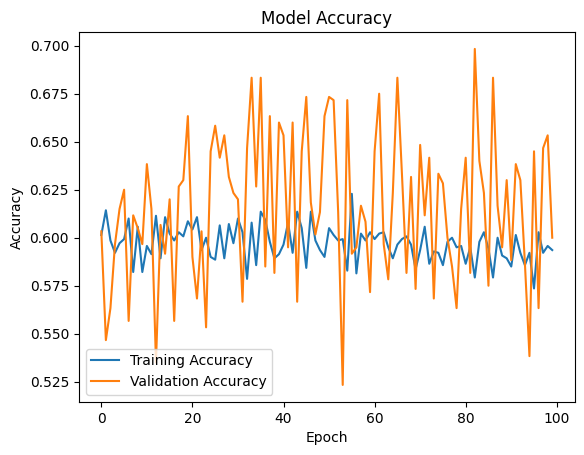

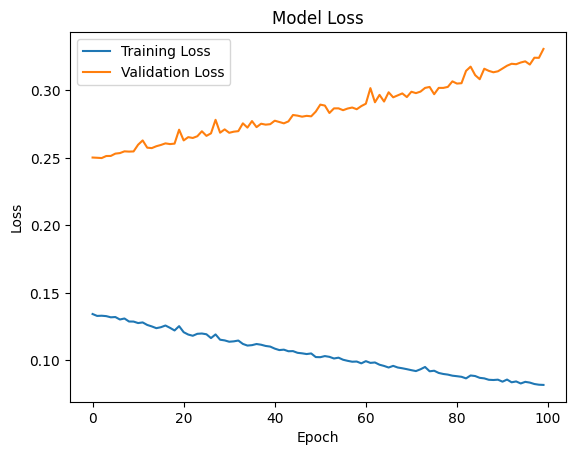

In [47]:
import matplotlib.pyplot as plt

# 2) Tracer les résultats de l'historique : accuracy et erreur en fonction
     #  des périodes pour les données d'apprentissage et les données de validation.
# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

#### Régularisation et Dropout


In [48]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2

model2 = Sequential()
#   3) Régularisation :
model2.add(Dense(64, activation='relu', input_shape=(20,), kernel_regularizer=l2(0.01)))

# 4) Ajouter une couche Dropout avec un taux de 40%, après la couche cachée
model2.add(Dropout(0.4))

# 3) Ajouter une couche de sortie avec une fonction d'activation sigmoïde
model2.add(Dense(3, activation='sigmoid'))

model2.summary()



/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 64)             │         1,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,539 (6.01 KB)

 Trainable params: 1,539 (6.01 KB)

 Non-trainable params: 0 (0.00 B)

#### Early stopping


In [49]:
from tensorflow.keras.callbacks import EarlyStopping
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 5) Créer une instance EarlyStopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=4)

# 6) Appeler la fonction fit pour 1000 périodes avec validation_data et callbacks.
history_early_stopping = model2.fit(sensors_train, parcels_train, epochs=1000, verbose=1, validation_data=(sensors_test, parcels_test), callbacks=[early_stopping])

Epoch 1/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4181 - loss: 1.3654 - val_accuracy: 0.5000 - val_loss: 0.8368
Epoch 2/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4946 - loss: 0.9585 - val_accuracy: 0.5600 - val_loss: 0.6855
Epoch 3/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5316 - loss: 0.7865 - val_accuracy: 0.5950 - val_loss: 0.5994
Epoch 4/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5575 - loss: 0.6678 - val_accuracy: 0.6200 - val_loss: 0.5503
Epoch 5/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5846 - loss: 0.6201 - val_accuracy: 0.5717 - val_loss: 0.5165
Epoch 6/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5966 - loss: 0.5747 - val_accuracy: 0.6133 - val_loss: 0.4854
Epoch 7/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6081 - loss: 0.5171 - val_accuracy: 0.5633 - val_loss: 0.4675
Epoch 8/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6141 - loss: 0.5265 - val_accuracy: 0.

####

#### ModelCheckpoint

In [50]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# 7) Créer un callback EarlyStopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)

# 8) Créer le callback ModelCheckpoint
model_checkpoint = ModelCheckpoint(filepath='/content/best_irrigation_model.hdf5.keras', monitor='val_accuracy', save_best_only=True)


In [51]:
# 9) Appeler la fonction fit pour 10000000 périodes avec validation_data et les callbacks.
history_checkpoint = model2.fit(sensors_train, parcels_train, epochs=10000000, verbose=1, validation_data=(sensors_test, parcels_test), callbacks=[early_stopping, model_checkpoint])

Epoch 1/10000000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6014 - loss: 0.4897 - val_accuracy: 0.6267 - val_loss: 0.4236
Epoch 2/10000000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6363 - loss: 0.4540 - val_accuracy: 0.5833 - val_loss: 0.4091
Epoch 3/10000000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5905 - loss: 0.4411 - val_accuracy: 0.5867 - val_loss: 0.3918
Epoch 4/10000000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6023 - loss: 0.4359 - val_accuracy: 0.5950 - val_loss: 0.3814
Epoch 5/10000000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6146 - loss: 0.4104 - val_accuracy: 0.6767 - val_loss: 0.3714
Epoch 6/10000000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6433 - loss: 0.3914 - val_accuracy: 0.6300 - val_loss: 0.3603
Epoch 7/10000000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6324 - loss: 0.3886 - val_accuracy: 0.5900 - val_loss: 0.3506
Epoch 8/10000000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6051 -

In [52]:
from tensorflow.keras.models import load_model

# 10) Charger le modèle enregistré
loaded_model = load_model('/content/best_irrigation_model.hdf5.keras')

# Afficher son architecture et ses paramètres
loaded_model.summary()

# Afficher l'erreur et l'accuracy sur les données de validation.
loss, accuracy = loaded_model.evaluate(sensors_test, parcels_test, verbose=0)

print(f"\nLoss => validation data: {loss:.4f}")
print(f"Accuracy => validation data: {accuracy:.4f}")

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 64)             │         1,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,619 (18.05 KB)

 Trainable params: 1,539 (6.01 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,080 (12.04 KB)


Loss => validation data: 0.3714
Accuracy => validation data: 0.6767


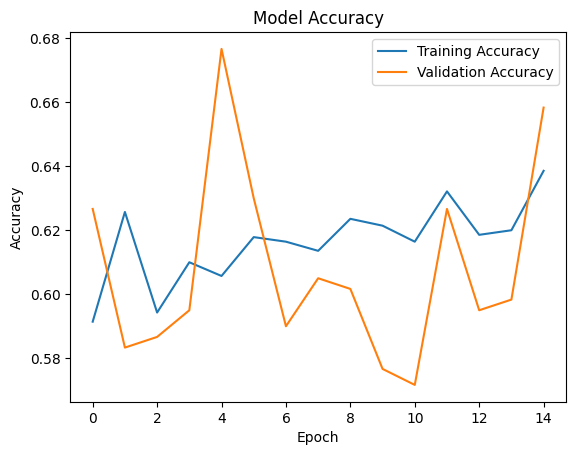

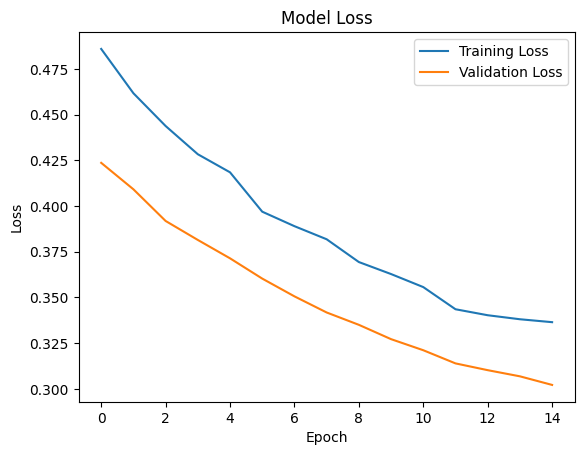

In [53]:
import matplotlib.pyplot as plt
# Plot accuracy
plt.plot(history_checkpoint.history['accuracy'], label='Training Accuracy')
plt.plot(history_checkpoint.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot loss
plt.plot(history_checkpoint.history['loss'], label='Training Loss')
plt.plot(history_checkpoint.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()